In [2]:
from helpers import build_spectrum
import pandas as pd
import numpy as np
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

<span style="color:#1f4068"></span> <span style="color:#e43f5a"></span>

## Data description

We noticed that features don't have exactly the same structure in both datasets. <span style="color:#1f4068">Particularities in the original dataset are highlighted in blue.</span> <span style="color:#e43f5a">Particularities in the additional dataset are highlighted in pink.</span>

* Input variables:
    * bank client data:
        1. age (numeric)
        2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
        3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
        4. education <span style="color:#1f4068">(categorical: "unknown","secondary","primary","tertiary")</span> <span style="color:#e43f5a">(categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")</span>
        5. default: has credit in default? <span style="color:#1f4068">(binary: "yes","no")</span> <span style="color:#e43f5a">(categorical: "no","yes","unknown")</span>
        6. <span style="color:#1f4068">balance: average yearly balance, in euros (numeric)</span>
        6. housing: has housing loan? <span style="color:#1f4068"> (binary: "yes","no")</span> <span style="color:#e43f5a">(categorical: "no","yes","unknown")</span>
        7. loan: has personal loan? <span style="color:#1f4068"> (binary: "yes","no")</span> <span style="color:#e43f5a">(categorical: "no","yes","unknown")</span>
    * related with the last contact of the current campaign:
        8. contact: contact communication type <span style="color:#1f4068">(categorical: "unknown","telephone","cellular")</span> <span style="color:#e43f5a">(categorical: "cellular","telephone")</span>
        9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
        10. <span style="color:#1f4068">day: last contact day of the month (numeric)</span>
        10. <span style="color:#e43f5a">day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")</span>
        11. duration: last contact duration, in seconds (numeric). **Important note:** this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    * other attributes:
        12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
        13. pdays: number of days that passed by after the client was last contacted from a previous campaign <span style="color:#1f4068">(numeric, -1 means client was not previously contacted)</span> <span style="color:#e43f5a">(numeric; 999 means client was not previously contacted)</span>
        14. previous: number of contacts performed before this campaign and for this client (numeric)
        15. poutcome: outcome of the previous marketing campaign <span style="color:#1f4068">(categorical: "unknown","other","failure","success")</span> <span style="color:#e43f5a">(categorical: "failure","nonexistent","success")</span>
    * <span style="color:#e43f5a">social and economic context attributes
        16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
        17. cons.price.idx: consumer price index - monthly indicator (numeric)     
        18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
        19. euribor3m: euribor 3 month rate - daily indicator (numeric)
        20. nr.employed: number of employees - quarterly indicator (numeric)</span>

* Output variable (desired target):
    * 
        21. y - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
data = pd.read_csv('datasets/bank-additional-full.csv', sep=';')

one_enc_data = build_spectrum(data)

Fraction of No :
0.8873458288821987
Fraction of Yes :
0.11265417111780131


In [16]:
categorical_cols = data.columns[data.dtypes == 'object'].drop('y')
numerical_cols = data.columns.drop(categorical_cols).drop('y')

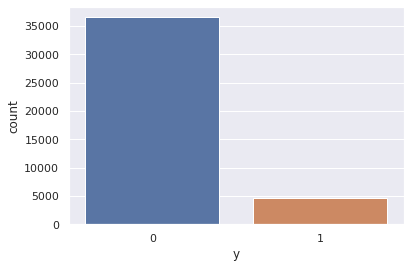

In [6]:
ax = sns.countplot(one_enc_data['y'],label="Count")
fig = ax.get_figure()
fig.savefig('class.png')

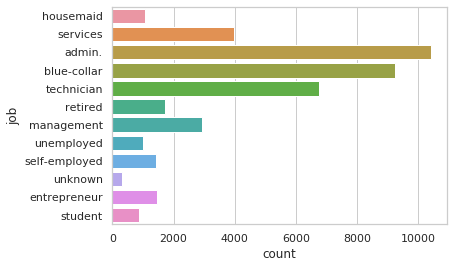

In [14]:
sns.countplot(y='job', data=data);


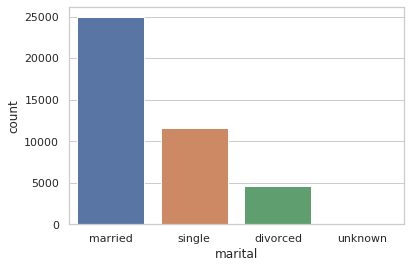

In [15]:
sns.countplot(x='marital', data=data);

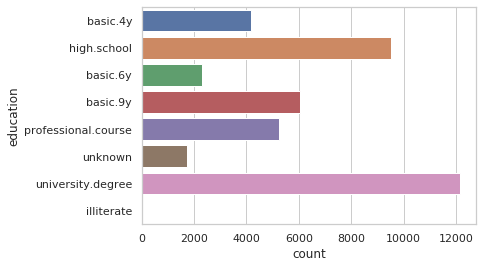

In [17]:
sns.countplot(y='education', data=data);

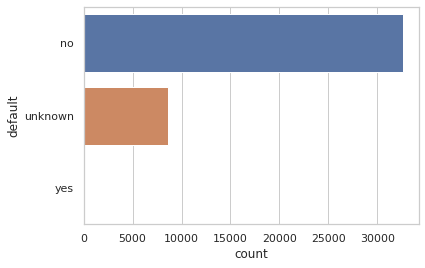

In [19]:
sns.countplot(y='default', data=data);

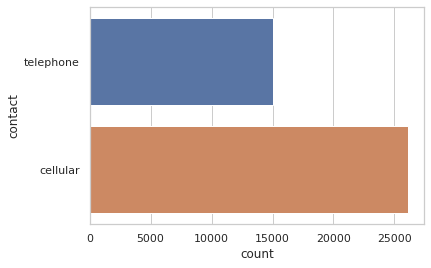

In [20]:
sns.countplot(y='contact', data=data);

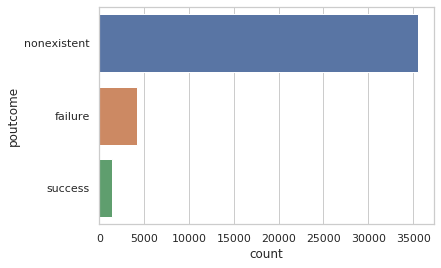

In [21]:
sns.countplot(y='poutcome', data=data);

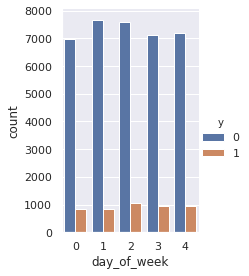

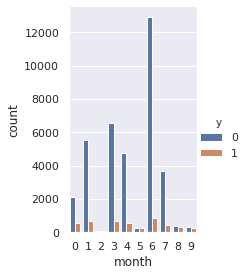

In [7]:
sns.catplot(x="day_of_week", hue="y",
                data=one_enc_data, kind="count",
                height=4, aspect=.7);

sns.catplot(x="month", hue="y",
                data=one_enc_data, kind="count",
                height=4, aspect=.7);

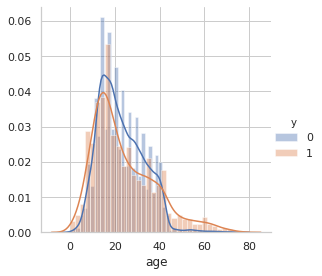

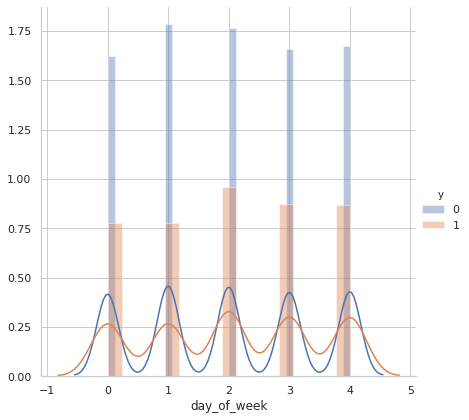

In [8]:
sns.set_style("whitegrid")
sns_plot = sns.FacetGrid(one_enc_data, hue="y", size=4) \
   .map(sns.distplot, "age") \
   .add_legend()
sns_plot.savefig('age.png')

sns.set_style("whitegrid")
sns.FacetGrid(one_enc_data, hue="y", size=6) \
   .map(sns.distplot, "day_of_week") \
   .add_legend()


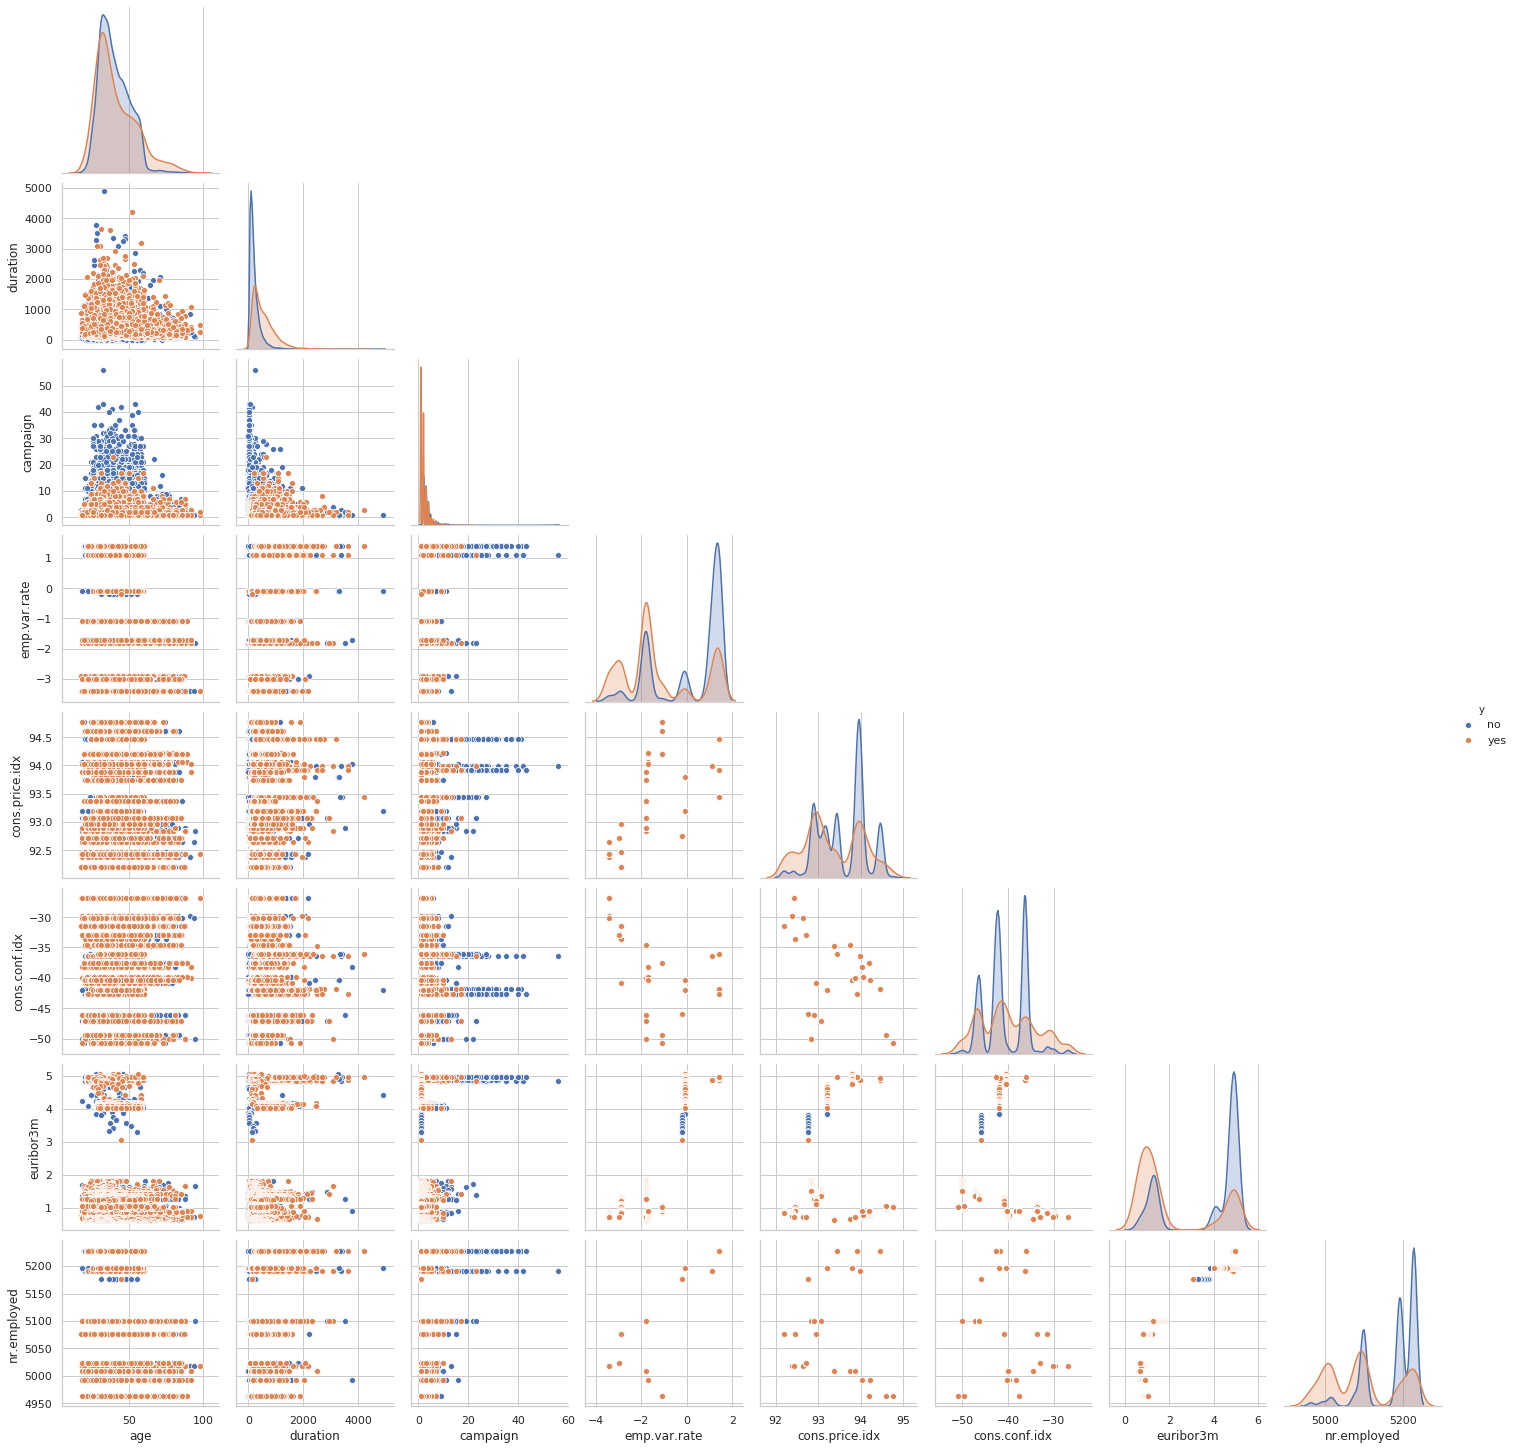

In [9]:
sns.set_style("whitegrid")
sns.pairplot(data, vars=numerical_cols.drop(['pdays', 'previous']), hue='y', corner=True) 
plt.show()

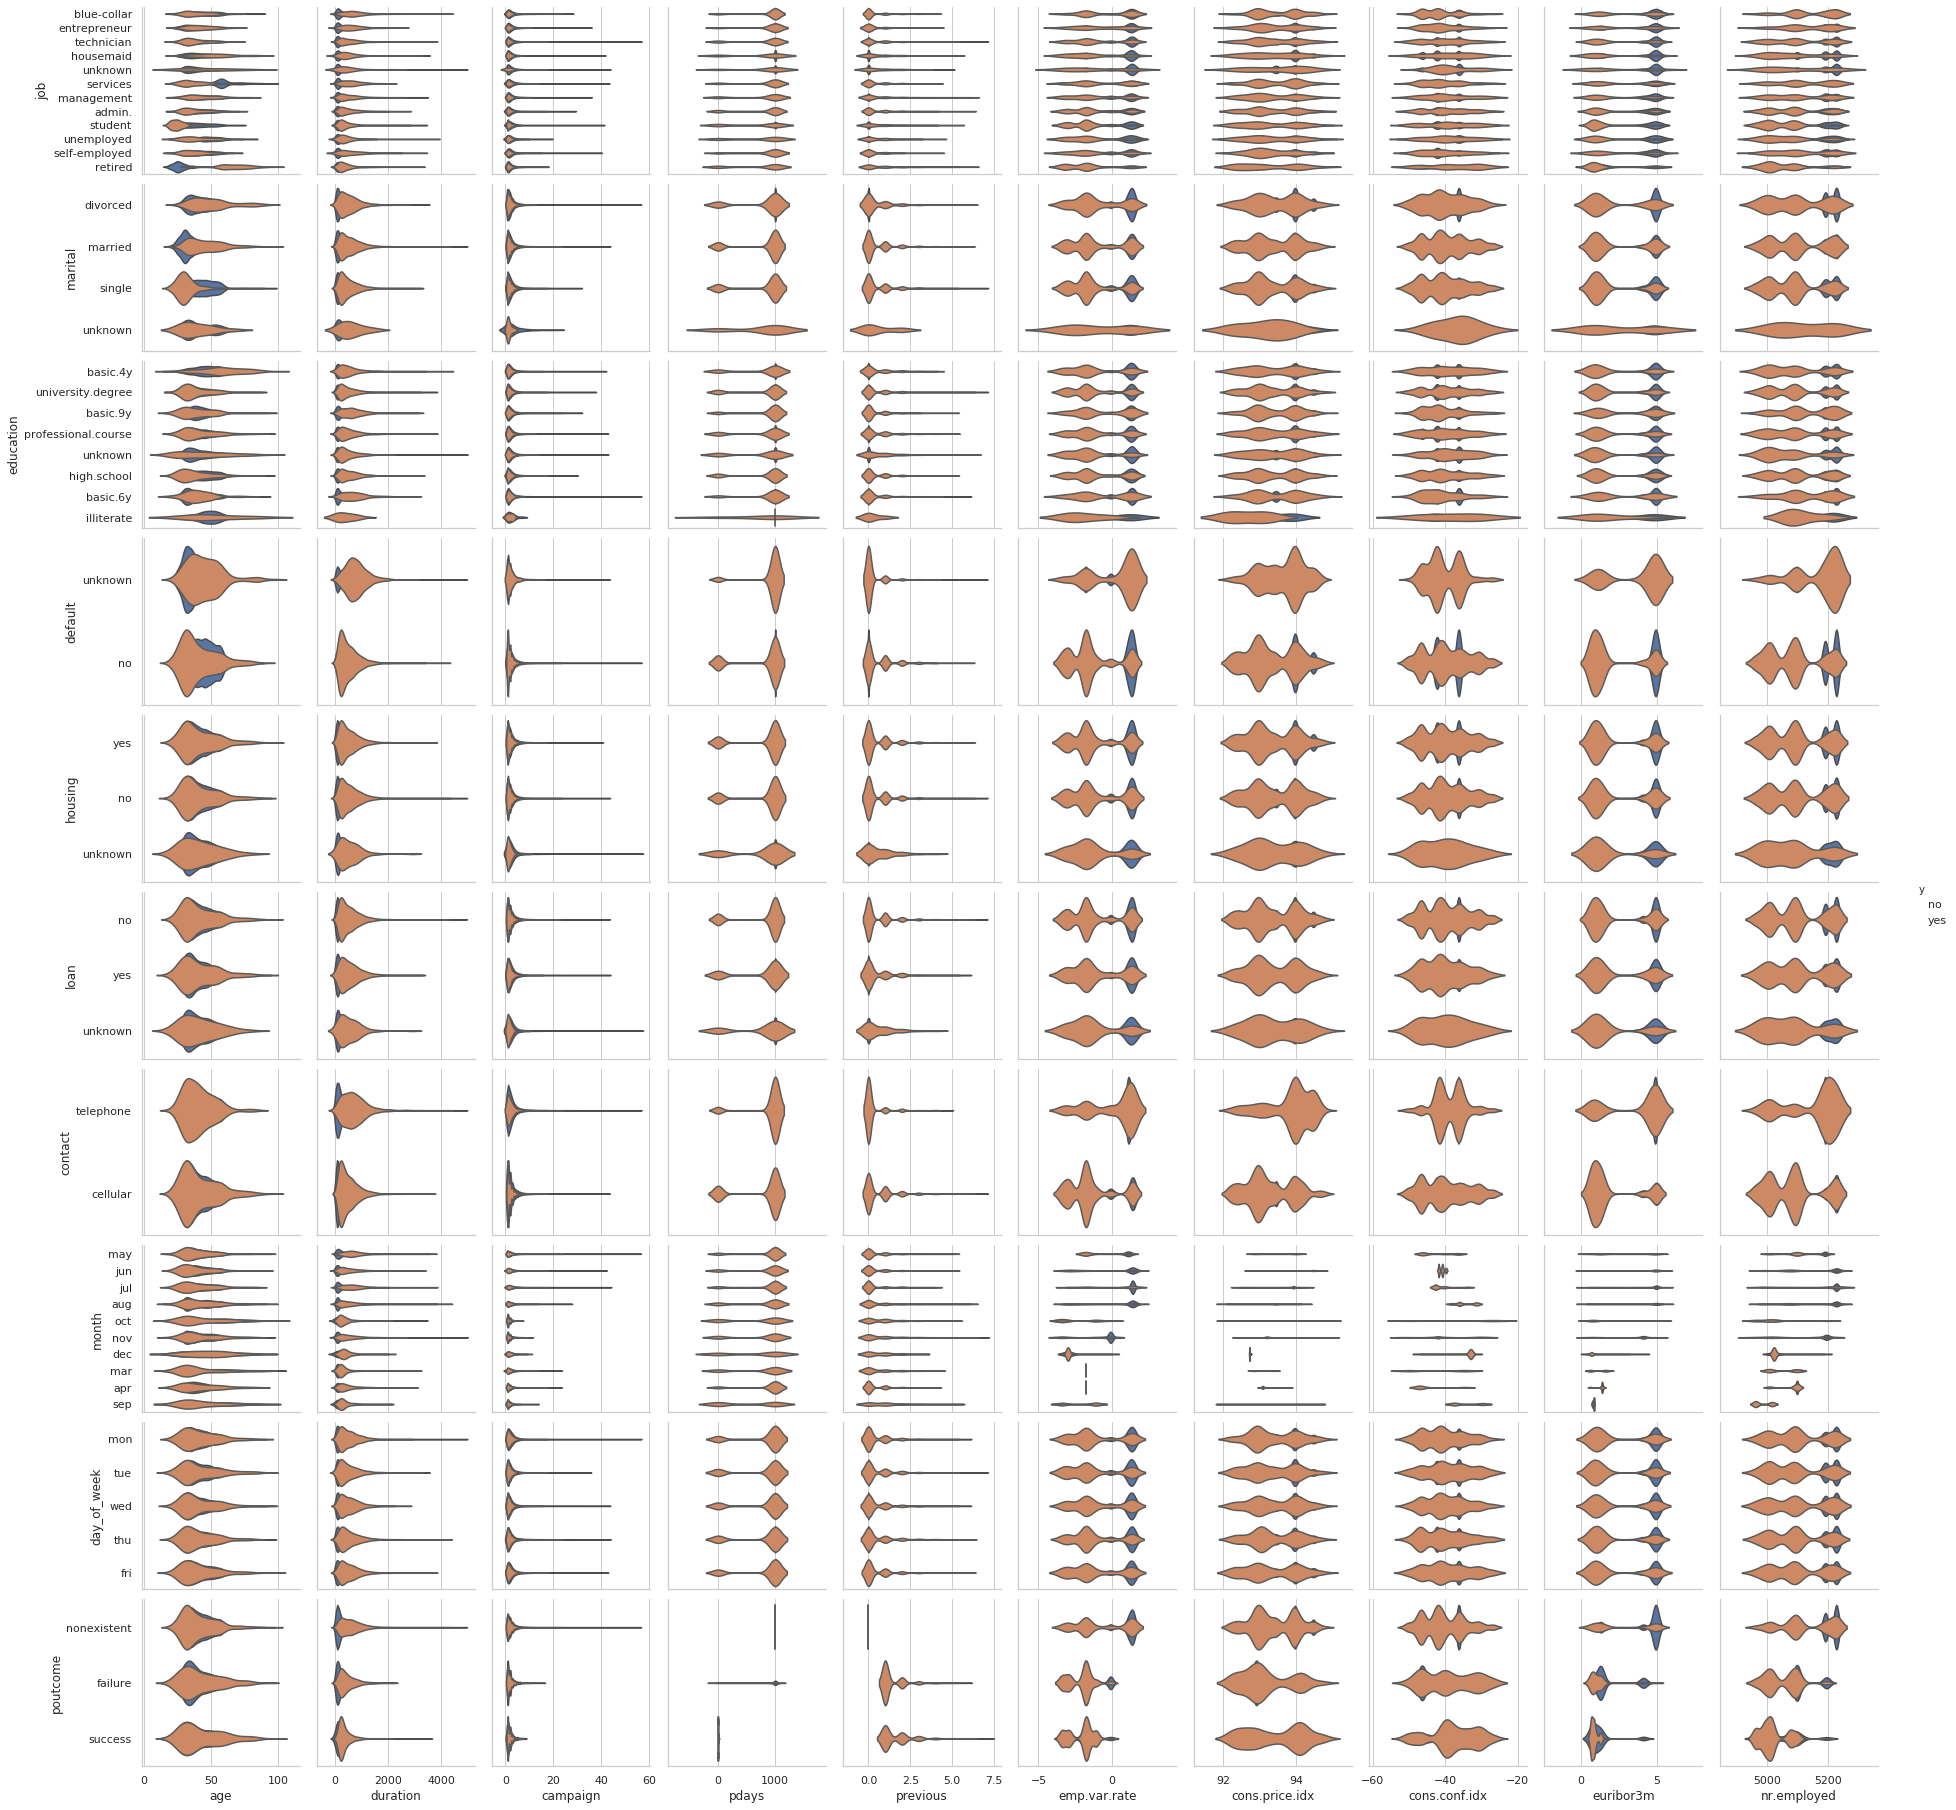

In [10]:
g = sns.PairGrid(data, x_vars=numerical_cols, y_vars=categorical_cols, hue='y')
g = g.map(sns.violinplot, inner=None, split=True) # split doesn't seem to work. It's supposed to draw two halves of the violin, one for each output
g = g.add_legend()
plt.show()